In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
lambda_ = 1
mu = 2       
p = 0.5        
N = 1000

C = np.random.binomial(1,p, N)

X = np.random.exponential(1/lambda_ , N)
Y = np.random.exponential(1/mu ,N)
Z = C*X +(1-C)*Y


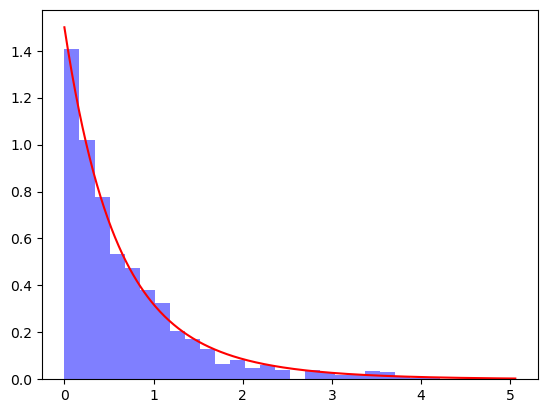

In [4]:

def densite_theorique(Z):
    return P*lambda_*np.exp(-lambda_*Z) + (1-P)*mu*np.exp(-mu*Z)

plt.hist(Z, bins=30, density=True, alpha=0.5, color='blue')

z_valeur = np.linspace(0, np.max(Z), 500)
plt.plot(z_valeur, densite_theorique(z_valeur), 'r-')
plt.show()



In [5]:
# generalisation
lambda_ = 1/2
mu = 1/4
p = 1/ 3
donne = [4.02, 0.33, 0.86, 0.67, 0.86, 0.80, 4.43, 1.09, 3.75, 0.85, 3.09, 5.17, 10.9, 2.85, 6.76]

def f_X(z):
    return lambda_ * np.exp(-lambda_ * z)

def f_Y(z):
    return mu * np.exp(-mu * z)

def P_C1_sachant_Z(z):
    return (p * f_X(z)) / (p * f_X(z) + (1 - p) * f_Y(z))

def P_C0_sachant_Z(z):
    return ((1 - p) * f_Y(z)) / (p * f_X(z) + (1 - p) * f_Y(z))

probabilite_X = [P_C1_sachant_Z(z) for z in donne]
probabilite_Y = [P_C0_sachant_Z(z) for z in donne]

for i, z in enumerate(donne):
    print(f"z = {z:.2f} : P(C=1 | Z=z) = {probabilite_X[i]:.4f}, P(C=0 | Z=z) = {probabilite_Y[i]:.4f}")





z = 4.02 : P(C=1 | Z=z) = 0.2680, P(C=0 | Z=z) = 0.7320
z = 0.33 : P(C=1 | Z=z) = 0.4794, P(C=0 | Z=z) = 0.5206
z = 0.86 : P(C=1 | Z=z) = 0.4465, P(C=0 | Z=z) = 0.5535
z = 0.67 : P(C=1 | Z=z) = 0.4582, P(C=0 | Z=z) = 0.5418
z = 0.86 : P(C=1 | Z=z) = 0.4465, P(C=0 | Z=z) = 0.5535
z = 0.80 : P(C=1 | Z=z) = 0.4502, P(C=0 | Z=z) = 0.5498
z = 4.43 : P(C=1 | Z=z) = 0.2483, P(C=0 | Z=z) = 0.7517
z = 1.09 : P(C=1 | Z=z) = 0.4323, P(C=0 | Z=z) = 0.5677
z = 3.75 : P(C=1 | Z=z) = 0.2814, P(C=0 | Z=z) = 0.7186
z = 0.85 : P(C=1 | Z=z) = 0.4471, P(C=0 | Z=z) = 0.5529
z = 3.09 : P(C=1 | Z=z) = 0.3159, P(C=0 | Z=z) = 0.6841
z = 5.17 : P(C=1 | Z=z) = 0.2154, P(C=0 | Z=z) = 0.7846
z = 10.90 : P(C=1 | Z=z) = 0.0615, P(C=0 | Z=z) = 0.9385
z = 2.85 : P(C=1 | Z=z) = 0.3290, P(C=0 | Z=z) = 0.6710
z = 6.76 : P(C=1 | Z=z) = 0.1558, P(C=0 | Z=z) = 0.8442


In [ ]:
lambda_ = 2
mu = 0.5 
p = 0.5    
N = 1000

C = np.random.binomial(1,p, N)

X = np.random.exponential(1/lambda_ , N)
Y = np.random.exponential(1/mu ,N)
Z = C*X +(1-C)*Y


In [37]:
# algorithme EM                       
max_iter = 1000      
#N = len(donne)


lambda_0 = 1.5
mu_0 = 0.7
p_0 = 0.5    

lambda_list = [lambda_0]
mu_list = [mu_0]
p_list = [p_0]

for t in range(max_iter):
    prob = (p_list[1:] * lambda_list[1:] * np.exp(-lambda_[1:] * Z)) / \
          (p * lambda_list[1:] * np.exp(-lambda_list[1:] * Z) + (1 - p) * mu_list[1:] * np.exp(-mu_list[1:] * Z))
    
    p_nouv = np.mean(prob)
    lambda_nouv = np.sum(prob) / np.sum(prob * Z)
    mu_nouv = np.sum(1 - prob) / np.sum((1 - Z) * Z)


    p, lambda_, mu = p_nouv, lambda_nouv, mu_nouv
    

    p_list.append(p_nouv)
    lambda_list.append(lambda_nouv)
    mu_list.append(mu_nouv)

print(f"Estimation finale : p = {p:.4f}, lambda = {lambda_:.4f}, mu = {mu:.4f}")

TypeError: can't multiply sequence by non-int of type 'list'

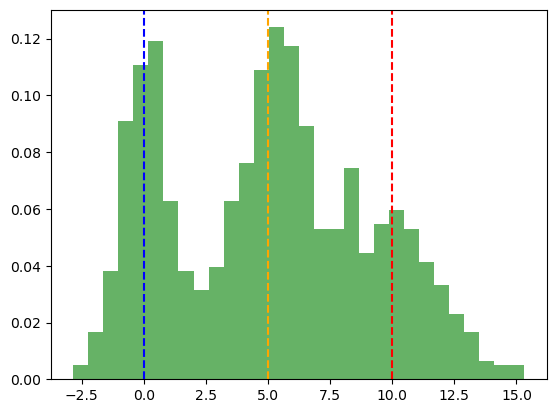

In [4]:
# Melange guassien

import numpy as np

np.random.seed(123)
# Paramètres
mu1, sigma1 = 0, 1      
mu2, sigma2 = 5, 1.5    
mu3, sigma3 = 10, 2      
p1, p2, p3 = 0.3, 0.4, 0.3  
N = 1000                 


C = np.random.choice([1, 2, 3], size=N, p=[p1, p2, p3])

X1 = np.random.normal(mu1, sigma1, N)
X2 = np.random.normal(mu2, sigma2, N)
X3 = np.random.normal(mu3, sigma3, N)

Z = np.where(C == 1, X1, np.where(C == 2, X2, X3))




plt.hist(Z, bins=30, density=True, alpha=0.6, color='g')
plt.axvline(mu1, color='blue', linestyle='--')
plt.axvline(mu2, color='orange', linestyle='--')
plt.axvline(mu3, color='red', linestyle='--')
plt.show()


In [ ]:
K = 3  # Nombre de composantes
mu = np.random.choice(Z, K)  # Moyennes initiales
sigma = np.random.uniform(1, 2, K)  # Variances initiales
pi = np.full(K, 1/K)  # Probabilités initiales égales


def gaussian_pdf(x, mean, std):
    return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

# Algorithme EM
max_iter = 100
tolerance = 1e-6
log_likelihoods = []

for iteration in range(max_iter):
    responsibilities = np.zeros((N, K))
    for k in range(K):
        responsibilities[:, k] = pi[k] * gaussian_pdf(Z, mu[k], sigma[k])
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)

    # M-step: Mise à jour des paramètres
    Nk = responsibilities.sum(axis=0)  # Nombre attendu de points dans chaque cluster
    pi = Nk / N  # Probabilités mises à jour
    mu = np.dot(responsibilities.T, Z) / Nk  # Moyennes mises à jour
    sigma = np.sqrt(np.dot(responsibilities.T, (Z[:, np.newaxis] - mu) ** 2) / Nk)  # Écarts-types mis à jour

    # Calcul du log-vraisemblance
    log_likelihood = np.sum(
        np.log(np.sum([pi[k] * gaussian_pdf(Z, mu[k], sigma[k]) for k in range(K)], axis=0))
    )
    log_likelihoods.append(log_likelihood)
    
    # Vérification de la convergence
    if iteration > 0 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tolerance:
        break

# Affichage des résultats
print("Paramètres estimés :")
for k in range(K):
    print(f"Composante {k+1}: mu = {mu[k]:.2f}, sigma = {sigma[k]:.2f}, pi = {pi[k]:.2f}")




ValueError: operands could not be broadcast together with shapes (1000,) (3,) 

In [ ]:
# Visualisation du mélange estimé
x_vals = np.linspace(Z.min(), Z.max(), 1000)
pdf_vals = np.sum([pi[k] * gaussian_pdf(x_vals, mu[k], sigma[k]) for k in range(K)], axis=0)

plt.hist(Z, bins=30, density=True, alpha=0.6, color='g', label="Données simulées")
plt.plot(x_vals, pdf_vals, color='black', lw=2, label="Mélange estimé (EM)")
for k in range(K):
    plt.axvline(mu[k], color=['blue', 'orange', 'red'][k], linestyle='--', label=f"mu{k+1} estimé")
plt.legend()
plt.title("Mélange Gaussien et estimation EM")
plt.show()

# 04 / 12  /2024  (suite)


In [6]:
import numpy as np                              
from numpy.linalg import inv                    
import matplotlib.pyplot as plt                 

from scipy.stats import multivariate_normal

In [7]:
# importation des donnes
brute=[]
with open("Brute.txt","r") as fichier:
    for l in fichier:
        T=[str(d) for d in l.split(",")]
        brute.append([float(T[0]),float(T[1])])

brute[0]

[0.2527921887661496, 9.473076927138726]

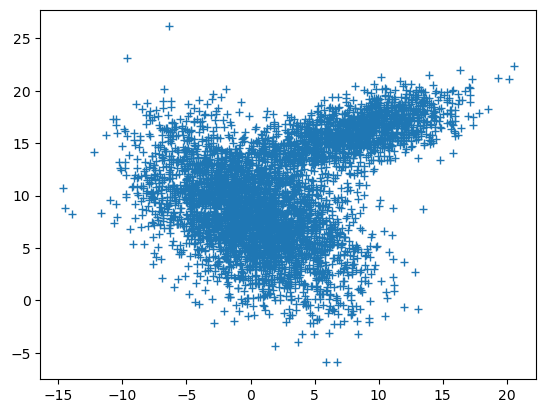

In [8]:
x =[]
y =[]
for i in range (len(brute)):
    x.append(brute[i][0])
    y.append(brute[i][1])


plt.plot(x, y, '+')

In [ ]:
# parametres initiaux

m1_0 = np.array([0, 10]) 
m2_0 = np.array([10, 15])
K1_0 = np.array([[16 ,-16],[-16,25]])
K2_0 = np.array([[6.25, 7],[7,12.25]])
p_0 = 0.5
N =100

In [10]:
# implementation de l'"algorithme  EM
def EM_Gauss(p, m1, m2, K1, K2, n, Z):
    for i in range(n):
        p1 = p * multivariate_normal.pdf(Z, mean=m1, cov=K1)
        p2 = (1-p)* multivariate_normal.pdf(Z, mean=m2, cov=K2)
        
        # probailite 
        P0=p2/(p1+p2) 
        P1=p1/(p1+p2)

        P0_Z1 = []; P0_Z2 = []; P0_ZX = []; P0_ZY = []; Cov2 = []
        P1_Z1 = []; P1_Z2 = []; P1_ZX = []; P1_ZY = []; Cov1 = []

        for j in range(len(Z)):
            # mise à joour de m1 
            P0_Z1.append(Z[j][0]*P0[j]) 
            P0_Z2.append(Z[j][1]*P0[j]) 
            # mise à jour de m2
            P1_Z1.append(Z[j][0]*P1[j])
            P1_Z2.append(Z[j][1]*P1[j])

            # mise a jour moyenne(mean)
        x1=np.sum(P1_Z1)/np.sum(P1) 
        y1=np.sum(P1_Z2)/np.sum(P1) 

        x2=np.sum(P0_Z1)/np.sum(P0) 
        y2=np.sum(P0_Z2)/np.sum(P0) 

        m1 = np.array([x1,y1])
        m2 = np.array([x2,y2])
        
        for k in range(len(Z)):
            # mise a jour de  K1
            P1_ZX.append(((Z[k][0]-x1)**2)*P1[k])
            P1_ZY.append(((Z[k][1]-y1)**2)*P1[k])
            Cov1.append(((Z[k][0]-x1)*(Z[k][1]-y1))*P1[k])
            # mise a jour de K2
            P0_ZX.append(((Z[k][0]-x2)**2)*P0[k])
            P0_ZY.append(((Z[k][1]-y2)**2)*P0[k])
            Cov2.append(((Z[k][0]-x2)*(Z[k][1]-y2))*P0[k])
            
        # Covariance mise a jour
        sigma1 = np.sum(P1_ZX)/np.sum(P1) 
        c1 = np.sum(Cov1)/np.sum(P1) 
        tau1 = np.sum(P1_ZY)/np.sum(P1)  
        K1 = np.array([[sigma1,c1],[c1,tau1]])
        
        sigma2 = np.sum(P0_ZX)/np.sum(P0) 
        c2 = np.sum(Cov2)/np.sum(P0)  
        tau2 = np.sum(P0_ZY)/np.sum(P0) 
        K2 = np.array([[sigma2,c2],[c2,tau2]])

        # mise a jour de p
        p=np.mean(P1)
        
    return p, m1, m2, K1, K2 



In [11]:
prob, mean1, mean2, Mcov1, Mcov2 = EM_Gauss(p_0, m1_0, m2_0, K1_0, K2_0, N, brute)

In [12]:
print('Le paramètre p  :',prob)
print('La moyenne m1 :',mean1)
print('La moyenne m2  :',mean2)
print('La matrice de variance K1 :',Mcov1)
print('La matrice de variance K2 vaut :',Mcov2)

Le paramètre p  : 0.7094478780966672
La moyenne m1 : [-0.04667844  8.17764981]
La moyenne m2  : [ 8.22238728 16.04865798]
La matrice de variance K1 : [[15.66072441 -7.35878007]
 [-7.35878007 15.90219201]]
La matrice de variance K2 vaut : [[13.89046659  4.184788  ]
 [ 4.184788    3.59689853]]


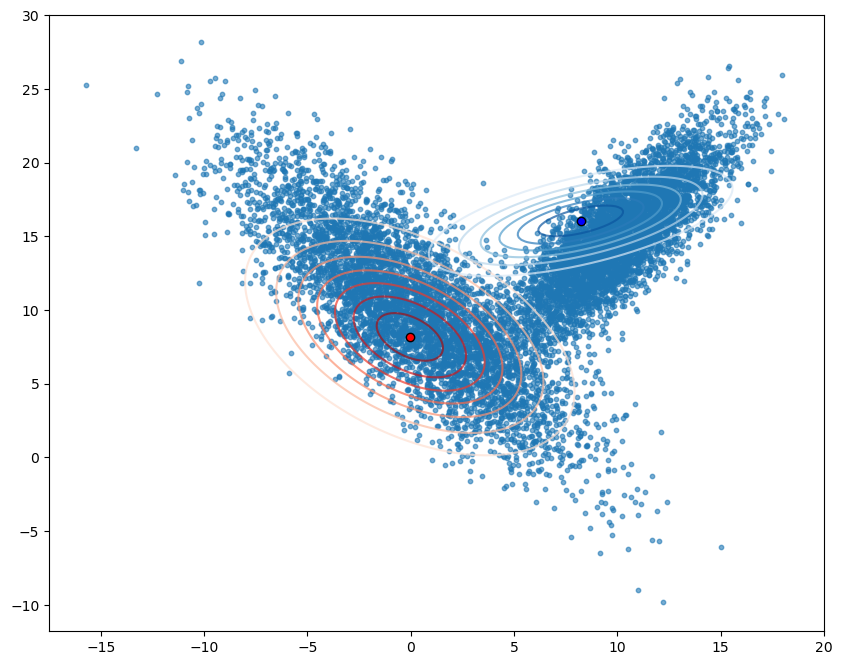

In [ ]:
# verification :: text des parametres
np.random.seed(123)
Z1 = np.random.multivariate_normal(mean=[0, 10], cov=[[16, -16], [-16, 25]], size=5000)
Z2 = np.random.multivariate_normal(mean=[10, 15], cov=[[6.25, 7], [7, 12.25]], size=5000)
Z = np.vstack((Z1, Z2))

# Paramètres estimés
p_est = prob
m1_est = mean1
m2_est = mean2
K1_est = Mcov1
K2_est = Mcov2

# Création d'une grille pour dessiner les contours
xx, yy = np.meshgrid(np.linspace(-10, 20, 200), np.linspace(0, 30, 200))
pos = np.dstack((xx, yy))
# Calcul des densités
rv1 = multivariate_normal(mean=m1_est, cov=K1_est)
rv2 = multivariate_normal(mean=m2_est, cov=K2_est)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)

# Tracé du nuage de points et des contours
plt.figure(figsize=(10, 8))
plt.scatter(Z[:, 0], Z[:, 1], s=10, label="Données", alpha=0.6)
plt.contour(xx, yy, z1, levels=8, cmap="Reds", alpha=0.7)
plt.contour(xx, yy, z2, levels=8, cmap="Blues", alpha=0.7)

# Ajoutons des moyennes estimées
plt.scatter(*m1_est, color="red", edgecolor="black", zorder=5)
plt.scatter(*m2_est, color="blue", edgecolor="black", zorder=5)

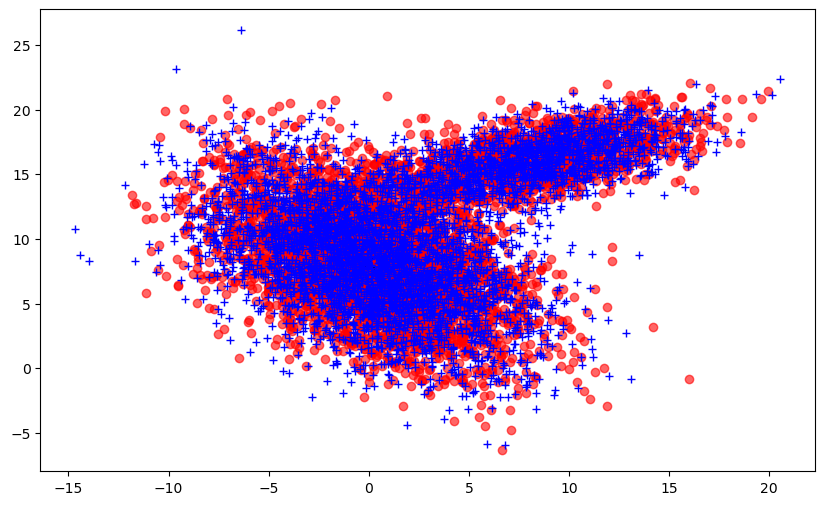

In [14]:

n_points = len(x)  
n1 = int(p_est * n_points)  
n2 = n_points - n1         

Z1 = np.random.multivariate_normal(mean=m1_est, cov=K1_est, size=n1)
Z2 = np.random.multivariate_normal(mean=m2_est, cov=K2_est, size=n2)

# Tracé des données
plt.figure(figsize=(10, 6))

# Nuage de points initial
plt.plot(x, y, '+', label="Données initiales", color="blue")

plt.scatter(Z1[:, 0], Z1[:, 1], c='red', alpha=0.6)
plt.scatter(Z2[:, 0], Z2[:, 1], c='red', alpha=0.6)



plt.scatter(m1_est[0], m1_est[1], color='black', marker='x', s=100)
plt.scatter(m2_est[0], m2_est[1], color='orange', marker='x', s=100)



In [ ]:
##test 2
m1_0 = np.array([0, 10]) 
m2_0 = np.array([10, 15])
K1_0 = np.array([[25,-2],[-2,24]])
K2_0 = np.array([[14, 4],[4,9]])
p_0 = 0.5
N =10  

In [16]:
# implementation de l'"algorithme  EM
def EM_Gauss(p, m1, m2, K1, K2, n, Z):
    for i in range(n):
        p1 = p * multivariate_normal.pdf(Z, mean=m1, cov=K1)
        p2 = (1-p)* multivariate_normal.pdf(Z, mean=m2, cov=K2)
        
        # probailite 
        P0=p2/(p1+p2) 
        P1=p1/(p1+p2)

        P0_Z1 = []; P0_Z2 = []; P0_ZX = []; P0_ZY = []; Cov2 = []
        P1_Z1 = []; P1_Z2 = []; P1_ZX = []; P1_ZY = []; Cov1 = []

        for j in range(len(Z)):
            # mise à joour de m1 
            P0_Z1.append(Z[j][0]*P0[j]) 
            P0_Z2.append(Z[j][1]*P0[j]) 
            # mise à jour de m2
            P1_Z1.append(Z[j][0]*P1[j])
            P1_Z2.append(Z[j][1]*P1[j])

            # mise a jour moyenne(mean)
        x1=np.sum(P1_Z1)/np.sum(P1) 
        y1=np.sum(P1_Z2)/np.sum(P1) 

        x2=np.sum(P0_Z1)/np.sum(P0) 
        y2=np.sum(P0_Z2)/np.sum(P0) 

        m1 = np.array([x1,y1])
        m2 = np.array([x2,y2])
        
        for k in range(len(Z)):
            # mise a jour de  K1
            P1_ZX.append(((Z[k][0]-x1)**2)*P1[k])
            P1_ZY.append(((Z[k][1]-y1)**2)*P1[k])
            Cov1.append(((Z[k][0]-x1)*(Z[k][1]-y1))*P1[k])
            # mise a jour de K2
            P0_ZX.append(((Z[k][0]-x2)**2)*P0[k])
            P0_ZY.append(((Z[k][1]-y2)**2)*P0[k])
            Cov2.append(((Z[k][0]-x2)*(Z[k][1]-y2))*P0[k])
            
        # Covariance mise a jour
        sigma1 = np.sum(P1_ZX)/np.sum(P1) 
        c1 = np.sum(Cov1)/np.sum(P1) 
        tau1 = np.sum(P1_ZY)/np.sum(P1)  
        K1 = np.array([[sigma1,c1],[c1,tau1]])
        
        sigma2 = np.sum(P0_ZX)/np.sum(P0) 
        c2 = np.sum(Cov2)/np.sum(P0)  
        tau2 = np.sum(P0_ZY)/np.sum(P0) 
        K2 = np.array([[sigma2,c2],[c2,tau2]])

        # mise a jour de p
        p=np.mean(P1)
        
    return p, m1, m2, K1, K2 



In [17]:
prob, mean1, mean2, Mcov1, Mcov2 = EM_Gauss(p_0, m1_0, m2_0, K1_0, K2_0, N, brute)

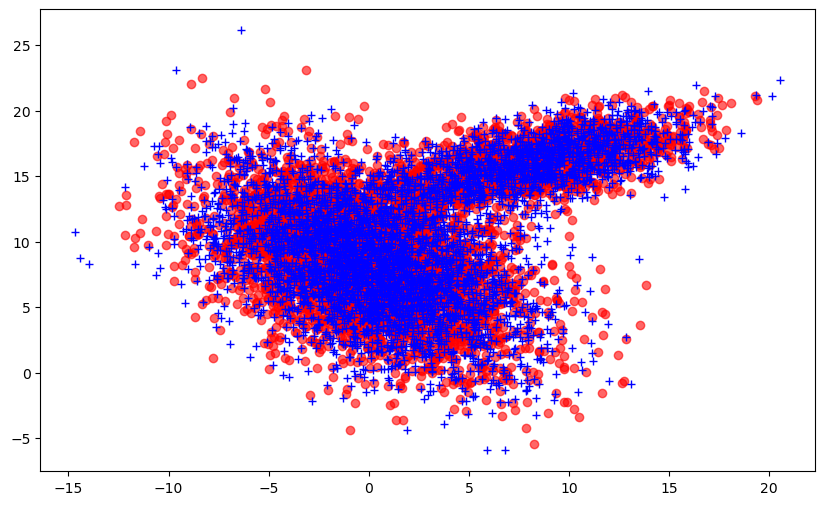

In [18]:

# Paramètres estimés
p_est = prob
m1_est = mean1
m2_est = mean2
K1_est = Mcov1
K2_est = Mcov2

n_points = len(x)  
n1 = int(p_est * n_points)  
n2 = n_points - n1         

Z1 = np.random.multivariate_normal(mean=m1_est, cov=K1_est, size=n1)
Z2 = np.random.multivariate_normal(mean=m2_est, cov=K2_est, size=n2)

# Tracé des données
plt.figure(figsize=(10, 6))

# Nuage de points initial
plt.plot(x, y, '+', label="Données initiales", color="blue")

plt.scatter(Z1[:, 0], Z1[:, 1], c='red', alpha=0.6)
plt.scatter(Z2[:, 0], Z2[:, 1], c='red', alpha=0.6)




## Classification 

In [19]:
Classification=[]
with open("Classification.txt","r") as fichier:
    Classification = [int(l) for l in fichier]

print(Classification[0:10])

[2, 2, 1, 2, 2, 2, 2, 2, 2, 2]


In [ ]:
def Classification_Gauss(p, m1, m2, K1, K2, Z, C):

    p1 = p * multivariate_normal.pdf(Z, mean=m1, cov=K1)
    p2 = (1-p)* multivariate_normal.pdf(brute, mean=m2, cov=K2)

    P0 = p2/(p1+p2) 
    P1 = p1/(p1+p2)

    compt = 0
    clusters =[]

    for i in range(len(Z)):

        if(P1[i]>P0[i]):
            clusters.append(2)
        else:
            clusters.append(1)

        if C[i]==clusters[i] : compt=compt+1

    print(f'groupe contenant  {compt/len(Z)*100}% des meme valeurs .') 

    return 


In [27]:
Classification_Gauss(p_0, m1_0, m2_0, K1_0, K2_0, brute, Classification)

groupe contenant  94.22% des meme valeurs .


In [39]:

# Fonction de classification
def Classification_Gauss1(p, m1, m2, K1, K2, Z, C):
    p1 = p * multivariate_normal.pdf(Z, mean=m1, cov=K1)
    p2 = (1 - p) * multivariate_normal.pdf(Z, mean=m2, cov=K2)

    # Probabilités pour chaque cluster
    P1 = p1 / (p1 + p2)
    P0 = p2 / (p1 + p2)

    clusters = []
    for i in range(len(Z)):
        if P1[i] > P0[i]:
            clusters.append(2)  
        else:
            clusters.append(1) 


    correct = sum(1 for i in range(len(C)) if C[i] == clusters[i])
    accuracy = correct / len(C) * 100
    print(f"Clusters contenant {accuracy:.2f}% des memes valeur Classification.")

    return clusters, P1



Clusters contenant 96.90% des memes valeur Classification.


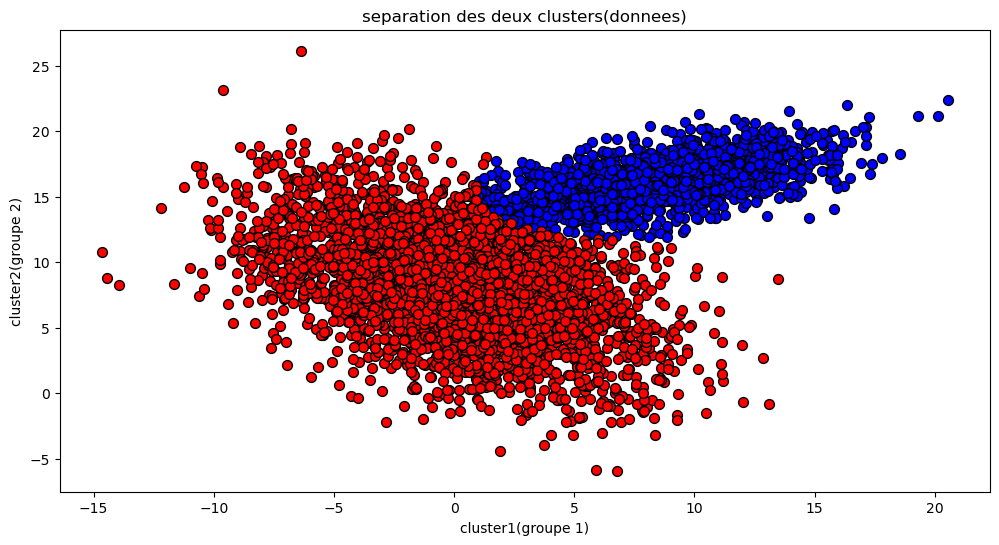

In [40]:

clusters, P1 = Classification_Gauss1(p_est, m1_est, m2_est, K1_est, K2_est, brute, Classification)

cluster_1 = [brute[i] for i in range(len(clusters)) if clusters[i] == 1]
cluster_2 = [brute[i] for i in range(len(clusters)) if clusters[i] == 2]


plt.figure(figsize=(12, 6))

# Cluster 1 en bleu
plt.scatter(
    [point[0] for point in cluster_1],
    [point[1] for point in cluster_1],
    c='blue', label='Cluster 1', edgecolor='k', s=50
)

# Cluster 2 en orange
plt.scatter(
    [point[0] for point in cluster_2],
    [point[1] for point in cluster_2],
    c='red', label='Cluster 2', edgecolor='k', s=50
)

# titres et legend
plt.xlabel("cluster1(groupe 1)")
plt.ylabel("cluster2(groupe 2)")
plt.title("separation des deux clusters(donnees)")
plt.show()



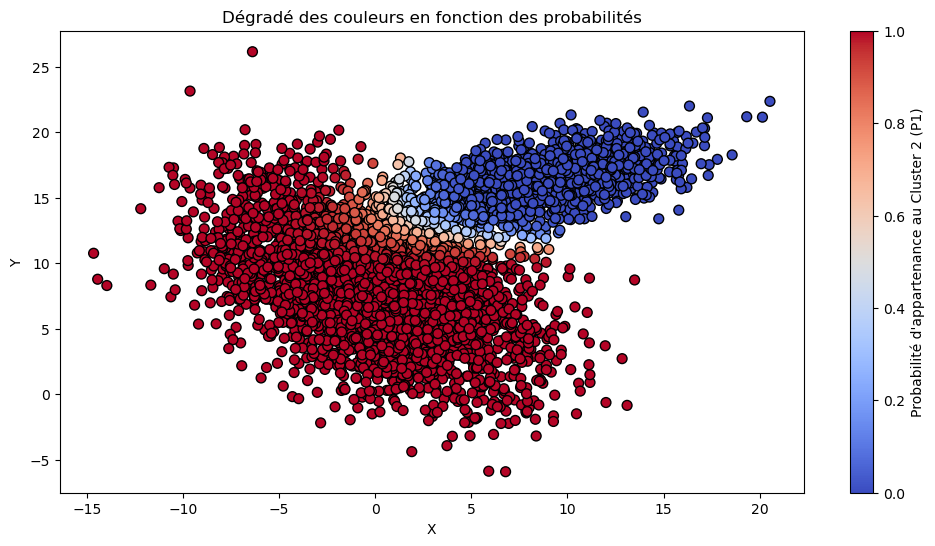

In [44]:

plt.figure(figsize=(12, 6))

# Dégradé des couleurs basé sur P1
plt.scatter(
    [point[0] for point in brute],
    [point[1] for point in brute],
    c=P1, cmap='coolwarm', edgecolor='k', s=50
)

# Titre et legendes
plt.colorbar(label="Probabilité d'appartenance au Cluster 2 (P1)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dégradé des couleurs en fonction des probabilités")
plt.show()
